<a href="https://colab.research.google.com/github/unicorn-yh/Blood-Cell-Detection/blob/main/BCCD_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifiying BCCD Dataset using SVM with RBF Kernel

In [1]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/BCCD/ImageSets/Main/trainval.txt", sep = " ", header=None)
val_df = pd.read_csv("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/BCCD/ImageSets/Main/test.txt", sep = " ", header=None)

In [4]:
train_df.head()

,0
0,BloodImage_00000
1,BloodImage_00001
2,BloodImage_00002
3,BloodImage_00003
4,BloodImage_00004


In [5]:
import os
images_path = os.listdir("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/BCCD/JPEGImages/")
len(images_path)

364

In [6]:
def show_images():
    plt.figure(figsize=(15,15))
    for i in range(10):
        n = np.random.choice(364, 1)
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        image = plt.imread(os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/BCCD/JPEGImages/", images_path[int(n)]))
        plt.imshow(image)
    plt.show()

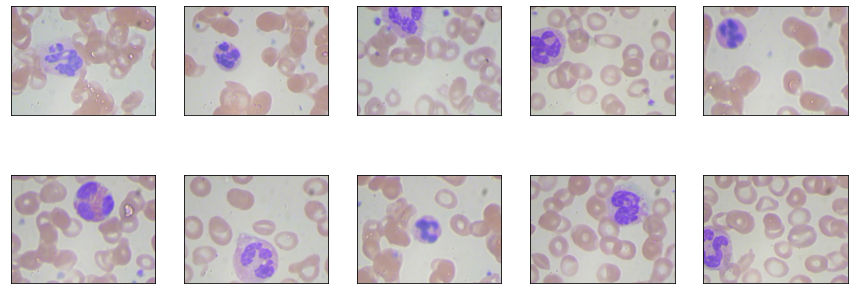

In [7]:
show_images()

In [8]:
import shutil

# Training images & their annotations
for path in train_df[0].tolist():
    image_path = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/BCCD/JPEGImages/", path + ".jpg")
    annotation_path = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/BCCD/Annotations/", path + ".xml")
    i_path = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/train", path + ".jpg")
    a_path = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/train", path + ".xml")
    shutil.copy2(image_path, i_path)
    shutil.copy2(annotation_path, a_path)

# Test images & their annotations
for path in val_df[0].tolist():
    image_path = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/BCCD/JPEGImages/", path + ".jpg")
    annotation_path = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/BCCD/Annotations/", path + ".xml")
    i_path = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/test", path + ".jpg")
    a_path = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/test", path + ".xml")
    shutil.copy2(image_path, i_path)
    shutil.copy2(annotation_path, a_path)

In [9]:
print("Train:",len(os.listdir("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/train")))
print("Test:",len(os.listdir("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/test")))

Train: 584
Test: 216


In [10]:
# copy the annotation files of the training images
for path in train_df[0].tolist():
    image_path = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/BCCD/Annotations/", path + ".xml")
    p = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/train", path + ".xml")
    shutil.copy2(image_path, p)

# copy the annotation files of the validation images
for path in val_df[0].tolist():
    path = path.split(".")[0] + ".xml"
    image_path = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/BCCD/Annotations/", path)
    p = os.path.join("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/test", path + ".xml")
    shutil.copy2(image_path, p)

In [11]:
import glob
import xml.etree.ElementTree as ET

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'classes', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [12]:
for directory in ['train','test']:
    image_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/{}'.format(directory))
    xml_df = xml_to_csv(image_path)
    xml_df.to_csv('/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/{}.csv'.format(directory), index=None)
    print('Successfully converted xml to csv.')

Successfully converted xml to csv.
Successfully converted xml to csv.


In [13]:
train_labels = pd.read_csv("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/train.csv")
test_labels = pd.read_csv("/content/drive/MyDrive/BloodcellDetection/BCCD/BCCD_Dataset/images/test.csv")

In [14]:
train_labels.head()

,filename,width,height,classes,xmin,ymin,xmax,ymax
0,BloodImage_00175.jpg,640,480,RBC,19,2,129,114
1,BloodImage_00175.jpg,640,480,RBC,1,176,99,293
2,BloodImage_00175.jpg,640,480,RBC,187,56,283,152
3,BloodImage_00175.jpg,640,480,RBC,298,182,418,275
4,BloodImage_00175.jpg,640,480,RBC,396,249,516,342


In [15]:
label = []
for i in train_labels.classes:
      if i == 'WBC':
            label.append(1)
      elif i == 'RBC':
            label.append(2)
      else:
            label.append(3)
train_labels['Label']= label

label = []
for i in test_labels.classes:
      if i == 'WBC':
            label.append(1)
      elif i == 'RBC':
            label.append(2)
      else:
            label.append(3)
test_labels['Label']= label

In [16]:
train_labels.head()

,filename,width,height,classes,xmin,ymin,xmax,ymax,Label
0,BloodImage_00175.jpg,640,480,RBC,19,2,129,114,2
1,BloodImage_00175.jpg,640,480,RBC,1,176,99,293,2
2,BloodImage_00175.jpg,640,480,RBC,187,56,283,152,2
3,BloodImage_00175.jpg,640,480,RBC,298,182,418,275,2
4,BloodImage_00175.jpg,640,480,RBC,396,249,516,342,2


In [17]:
train_labels["classes"].value_counts()

RBC          3350
WBC           301
Platelets     292
Name: classes, dtype: int64

In [18]:
test_labels["classes"].value_counts()

RBC          1610
WBC           142
Platelets     138
Name: classes, dtype: int64

### Get Mean X and Y

In [19]:
x,y=[],[]
xmin,xmax,ymin,ymax = [],[],[],[]
data,label = [],[]
index = -1
sum1,sum2,sum3 = 0,0,0
sum1y,sum2y,sum3y = 0,0,0
count1,count2,count3 = 0,0,0


'''TRAIN'''
for i in train_labels.xmin:
      xmin.append(i)
for i in train_labels.xmax:
      xmax.append(i)   
for i in range(len(xmin)):
      xtemp = xmax[i]-xmin[i]
      x.append(xtemp)

for i in train_labels.ymin:
      ymin.append(i)
for i in train_labels.ymax:
      ymax.append(i)   
for i in range(len(ymin)):
      ytemp = ymax[i]-ymin[i]
      y.append(ytemp)

for i in range(len(x)):
      data.append([x[i],y[i]])


for i in train_labels.Label:
      index += 1
      label.append(i)
      if i == 1:
            sum1 += x[index]
            sum1y += y[index]
            count1 += 1
      elif i == 2:
            sum2 += x[index]
            sum2y += y[index]
            count2 += 1
      elif i == 3:
            sum3 += x[index]
            sum3y += y[index]
            count3 += 1

'''for i in range(5):
      print(label[i],x[i])'''

aver1 = sum1/count1
aver2 = sum2/count2
aver3 = sum3/count3
aver4 = sum1y/count1
aver5 = sum2y/count2
aver6 = sum3y/count3
train_data = np.array(data)
train_label = np.array(label)

print('TRAIN AVERAGE X')
print('1','WBC:',aver1)
print('2','RBC:',aver2)
print('3','Platelets:',aver3)

print('\nTRAIN AVERAGE Y')
print('1','WBC:',aver4)
print('2','RBC:',aver5)
print('3','Platelets:',aver6)

'''print(xmin1,xmax1)
print(xmin2,xmax2)
print(xmin3,xmax3)'''


'''TEST'''
x,y=[],[]
xmin,xmax,ymin,ymax = [],[],[],[]
data,label = [],[]
index = -1
sum1,sum2,sum3 = 0,0,0
sum1y,sum2y,sum3y = 0,0,0
count1,count2,count3 = 0,0,0

for i in test_labels.xmin:
      xmin.append(i)
for i in test_labels.xmax:
      xmax.append(i)   
for i in range(len(xmin)):
      xtemp = xmax[i]-xmin[i]
      x.append(xtemp)

for i in test_labels.ymin:
      ymin.append(i)
for i in test_labels.ymax:
      ymax.append(i)   
for i in range(len(ymin)):
      ytemp = ymax[i]-ymin[i]
      y.append(ytemp)

data = []
for i in range(len(x)):
      data.append([x[i],y[i]])

for i in test_labels.Label:
      index += 1
      label.append(i)
      if i == 1:
            sum1 += x[index]
            sum1y += y[index]
            count1 += 1
      elif i == 2:
            sum2 += x[index]
            sum2y += y[index]
            count2 += 1
      elif i == 3:
            sum3 += x[index]
            sum3y += y[index]
            count3 += 1

aver1 = sum1/count1
aver2 = sum2/count2
aver3 = sum3/count3
aver4 = sum1y/count1
aver5 = sum2y/count2
aver6 = sum3y/count3
test_data = np.array(data)  
test_label = np.array(label)  

print('\nTEST AVERAGE X')
print('1','WBC:',aver1)
print('2','RBC:',aver2)
print('3','Platelets:',aver3)

print('\nTEST AVERAGE Y')
print('1','WBC:',aver4)
print('2','RBC:',aver5)
print('3','Platelets:',aver6)



TRAIN AVERAGE X
1 WBC: 195.0033222591362
2 RBC: 104.45044776119403
3 Platelets: 41.226027397260275

TRAIN AVERAGE Y
1 WBC: 176.08970099667775
2 RBC: 100.29880597014926
3 Platelets: 39.87328767123287

TEST AVERAGE X
1 WBC: 189.67605633802816
2 RBC: 104.3527950310559
3 Platelets: 43.05797101449275

TEST AVERAGE Y
1 WBC: 173.5211267605634
2 RBC: 100.5192546583851
3 Platelets: 41.47826086956522


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
clf=SVC(kernel='rbf',C=1.0,random_state=1).fit(train_data,train_label)
pred=clf.predict(test_data)
score=accuracy_score(test_label,pred)
CVscore=cross_val_score(clf,train_data,train_label,cv=4)
mean=CVscore.mean()
std=CVscore.std()
print('SVM with RBF Kernel')
print('Accuracy',score)
print('Cross Validation',CVscore)
print('Cross Validation Mean',mean)
print('Cross Validation Std',std)

SVM with RBF Kernel
Accuracy 0.9798941798941799
Cross Validation [0.99290061 0.98985801 0.98377282 0.96751269]
Cross Validation Mean 0.9835110326294004
Cross Validation Std 0.009803873884272596


### Organize Data

In [21]:
len(test_data),len(train_data)

(1890, 3943)

In [22]:
# TRAIN
count1,count2,count3=0,0,0
data_count = 500
for i in range(data_count):
  if test_label[i] == 1:
    count1+=1
  elif test_label[i] == 2:
    count2+=1
  elif test_label[i] == 3:
    count3+=1

print('WBC:',count1,', RBC:',count2,', Platelets:',count3)
    

WBC: 35 , RBC: 429 , Platelets: 36


In [23]:
# TEST
count1,count2,count3=0,0,0
data_count = 500
for i in range(data_count):
  if train_label[i] == 1:
    count1+=1
  elif train_label[i] == 2:
    count2+=1
  elif train_label[i] == 3:
    count3+=1

print('WBC:',count1,', RBC:',count2,', Platelets:',count3)

WBC: 41 , RBC: 422 , Platelets: 37


### Plot Figure

In [24]:
# TRAIN
grid_length=0.02                #网格中的步长
data = train_data[:data_count]
y = train_label[:data_count]
#创建网格，以绘制图表
minX,maxX=float(min(data[:,0]))-1,float(max(data[:,0]))+1  #3.3,8.9
minY,maxY=float(min(data[:,1]))-1,float(max(data[:,1]))+1  #1.0,5.4
#print(minX,maxX,minY,maxY)
x_num,y_num=np.meshgrid(np.arange(minX,maxX,grid_length),np.arange(minY,maxY,grid_length))
print(minX,maxX,minY,maxY)
print(x_num.shape,y_num.shape)

27.0 246.0 28.0 243.0
(10750, 10950) (10750, 10950)


In [25]:
Z=clf.predict(np.c_[x_num.ravel(),y_num.ravel()])


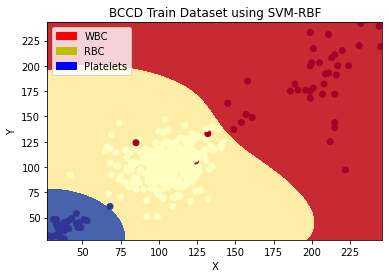

In [26]:
import matplotlib.patches as mpatches

Z=Z.reshape(x_num.shape)  
plt.contourf(x_num,y_num,Z,cmap=plt.cm.get_cmap('RdYlBu'),alpha=0.95)  #等高线函数：使用不同颜色划分区域
plt.scatter(data[:,0],data[:,1],c=y,cmap=plt.cm.get_cmap('RdYlBu'))      #以离散点的形式绘制训练数据
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(minX,maxX)
plt.ylim(minY,maxY)
#plt.xticks(())
plt.title('BCCD Train Dataset using SVM-RBF')

# Creating legend with color box
WBC = mpatches.Patch(color='r', label='WBC')
RBC = mpatches.Patch(color='y', label='RBC')
Platelets = mpatches.Patch(color='b', label='Platelets')
plt.legend(handles=[WBC,RBC,Platelets])

plt.show()

In [27]:
# TEST
grid_length=0.02                #网格中的步长
data = test_data[:data_count]
y = test_label[:data_count]
#创建网格，以绘制图表
minX,maxX=float(min(data[:,0]))-1,float(max(data[:,0]))+1  #3.3,8.9
minY,maxY=float(min(data[:,1]))-1,float(max(data[:,1]))+1  #1.0,5.4
#print(minX,maxX,minY,maxY)
x_num,y_num=np.meshgrid(np.arange(minX,maxX,grid_length),np.arange(minY,maxY,grid_length))
print(minX,maxX,minY,maxY)
print(x_num.shape,y_num.shape)

25.0 258.0 23.0 237.0
(10700, 11650) (10700, 11650)


In [28]:
Z=clf.predict(np.c_[x_num.ravel(),y_num.ravel()])

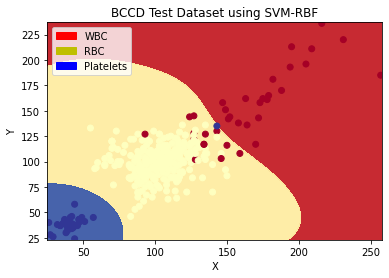

In [29]:
import matplotlib.patches as mpatches

Z=Z.reshape(x_num.shape)  
plt.contourf(x_num,y_num,Z,cmap=plt.cm.get_cmap('RdYlBu'),alpha=0.95)  #等高线函数：使用不同颜色划分区域
plt.scatter(data[:,0],data[:,1],c=y,cmap=plt.cm.get_cmap('RdYlBu'))      #以离散点的形式绘制训练数据
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(minX,maxX)
plt.ylim(minY,maxY)
#plt.xticks(())
plt.title('BCCD Test Dataset using SVM-RBF')

# Creating legend with color box
WBC = mpatches.Patch(color='r', label='WBC')
RBC = mpatches.Patch(color='y', label='RBC')
Platelets = mpatches.Patch(color='b', label='Platelets')
plt.legend(handles=[WBC,RBC,Platelets])

plt.show()